## Reshaping the data from Excel into dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_from_excel(sheet_name):
    
    #import excel file with all statistics
    df = pd.read_excel('data/Statistics.xlsx', sheet_name = sheet_name)
    
    #get rid of 1st two rows
    dff = df.drop([0,1], axis = 0)
    
    #update the index 
    dff = dff.reset_index(drop = True)
    dff.columns = ['Row Labels', 'Count']
    
    #further cleaning table
    dff = dff.drop(0, axis = 0)
    dff = dff.drop(dff.index[-1], axis = 0)
    
    dff.loc[dff['Row Labels'] == 'C', 'Row Labels'] = 'Conditional'
    dff.loc[dff['Row Labels'] == 'R', 'Row Labels'] = 'Rejected'
    dff.loc[dff['Row Labels'] == 'U', 'Row Labels'] = 'Unconditional'
    dff.loc[dff['Row Labels'] == '(blank)', 'Row Labels'] = 'N/A'
    
    #adding new row to the end because no one was yet rejected in 2023 
    if sheet_name == 'Offer Code_G0N0' or sheet_name == 'Offer Code_N321':
        new_row = {'Row Labels': 'Unconditional', 'Count': 0}
        #update the index
        dff = dff.append(new_row, ignore_index = True)
    
    #select only rows with year in the 1st column
    years_df = dff[dff['Row Labels'].str.match(r"\d{4}")].reset_index(drop = True)
    
    #give names to the columns 
    years_df.columns = ['Application year', 'Number of applicants']
    years_df['Application year'] = years_df['Application year'].astype(int)
    years_df['Number of applicants'] = years_df['Number of applicants'].astype(int)
    
    #list of years 
    years = years_df['Application year'].tolist()
    
    #list of total number of students for all above years
    totals = years_df['Number of applicants'].tolist()
    
    return dff, years_df, years, totals

In [2]:
dff_G0N0, years_df_G0N0, years_G0N0, totals_G0N0 = extract_from_excel('Offer Code_G0N0')
dff_N321, years_df_N321, years_N321, totals_N321 = extract_from_excel('Offer Code_N321')
dff_N3UD, years_df_N3UD, years_N3UD, totals_N3UD = extract_from_excel('Offer Code_N3UD')
dff_N3UD

C:\Users\ekmho\AppData\Local\Temp\ipykernel_21908\2815268870.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(new_row, ignore_index = True)
C:\Users\ekmho\AppData\Local\Temp\ipykernel_21908\2815268870.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(new_row, ignore_index = True)


Row Labels Count
1            2021   467
2     Conditional    46
3        Rejected   403
4   Unconditional     1
5             N/A    17
6            2022   564
7     Conditional    54
8        Rejected   496
9   Unconditional     5
10            N/A     9
11           2023   566
12    Conditional    20
13       Rejected   155
14  Unconditional     1
15            N/A   390

In [3]:
C_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'Conditional']['Count'].reset_index(drop = True).tolist()
R_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'Rejected']['Count'].reset_index(drop = True).tolist()
U_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'Unconditional']['Count'].reset_index(drop = True).tolist()
NA_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'N/A']['Count'].reset_index(drop = True).tolist()

In [4]:
C_N321 = dff_N321[dff_N321['Row Labels'] == 'Conditional']['Count'].reset_index(drop=True).tolist()
R_N321 = dff_N321[dff_N321['Row Labels'] == 'Rejected']['Count'].reset_index(drop=True).tolist()
U_N321 = dff_N321[dff_N321['Row Labels'] == 'Unconditional']['Count'].reset_index(drop=True).tolist()
NA_N321 = dff_N321[dff_N321['Row Labels'] == 'N/A']['Count'].reset_index(drop=True).tolist()

In [5]:
C_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'Conditional']['Count'].reset_index(drop=True).tolist()
R_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'Rejected']['Count'].reset_index(drop=True).tolist()
U_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'Unconditional']['Count'].reset_index(drop=True).tolist()
NA_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'N/A']['Count'].reset_index(drop=True).tolist()

In [6]:
tailored_df_MSB_AS = pd.DataFrame()

tailored_df_MSB_AS['Year']= years_G0N0
tailored_df_MSB_AS['Conditional for MSB']= C_G0N0
tailored_df_MSB_AS['Rejected for MSB']= R_G0N0
tailored_df_MSB_AS['Unconditional for MSB']= U_G0N0
tailored_df_MSB_AS['Not available for MSB']= NA_G0N0
tailored_df_MSB_AS['Total number of MSB applicants'] = totals_G0N0

tailored_df_MSB_AS['% Conditional for MSB']= tailored_df_MSB_AS['Conditional for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
tailored_df_MSB_AS['% Rejected for MSB']= tailored_df_MSB_AS['Rejected for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
tailored_df_MSB_AS['% Unconditional for MSB']= tailored_df_MSB_AS['Unconditional for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
tailored_df_MSB_AS['% Not available for MSB']= tailored_df_MSB_AS['Not available for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
    
    
tailored_df_MSB_AS['Conditional for AS'] = C_N321
tailored_df_MSB_AS['Rejected for AS'] = R_N321
tailored_df_MSB_AS['Unconditional for AS'] = U_N321
tailored_df_MSB_AS['Not available for AS'] = NA_N321
tailored_df_MSB_AS['Total number of AS applicants'] = totals_N321

tailored_df_MSB_AS['% Conditional for AS'] = tailored_df_MSB_AS['Conditional for AS'] / tailored_df_MSB_AS['Total number of AS applicants'] * 100
tailored_df_MSB_AS['% Rejected for AS'] = tailored_df_MSB_AS['Rejected for AS'] / tailored_df_MSB_AS['Total number of AS applicants'] * 100
tailored_df_MSB_AS['% Unconditional for AS'] = tailored_df_MSB_AS['Unconditional for AS'] / tailored_df_MSB_AS['Total number of AS applicants'] * 100
tailored_df_MSB_AS['% Not available for AS'] = tailored_df_MSB_AS['Not available for AS'] / tailored_df_MSB_AS['Total number of AS applicants'] * 100


tailored_df_MSB_AS

Year  Conditional for MSB  Rejected for MSB  Unconditional for MSB  \
0  2014                   45               221                      4   
1  2015                   53               179                      1   
2  2016                   38               131                     12   
3  2017                   53               123                      8   
4  2018                   79               258                      2   
5  2019                   92               389                      1   
6  2020                  102               415                      3   
7  2021                   68               473                      4   
8  2022                   93               503                      4   
9  2023                   21               201                      0   

   Not available for MSB  Total number of MSB applicants  \
0                      4                             274   
1                      3                             236   
2                      3                             184   
3                      3                             187   
4                     11                             350   
5                      7                             489   
6                     24                             544   
7                     12                             557   
8                      8                             608   
9                    298                             520   

   % Conditional for MSB  % Rejected for MSB  % Unconditional for MSB  \
0              16.423358           80.656934                 1.459854   
1              22.457627           75.847458                 0.423729   
2              20.652174           71.195652                 6.521739   
3              28.342246           65.775401                 4.278075   
4              22.571429           73.714286                 0.571429   
5              18.813906           79.550102                 0.204499   
6              18.750000           76.286765                 0.551471   
7              12.208259           84.919210                 0.718133   
8              15.296053           82.730263                 0.657895   
9               4.038462           38.653846                 0.000000   

   % Not available for MSB  Conditional for AS  Rejected for AS  \
0                 1.459854                 174              376   
1                 1.271186                 159              397   
2                 1.630435                 139              375   
3                 1.604278                 140              333   
4                 3.142857                 164              319   
5                 1.431493                 176              269   
6                 4.411765                 187              244   
7                 2.154399                 116              334   
8                 1.315789                 128              324   
9                57.307692                  60              104   

   Unconditional for AS  Not available for AS  Total number of AS applicants  \
0                     8                     4                            562   
1                    17                     9                            582   
2                    19                     5                            538   
3                    10                     4                            487   
4                     1                    14                            498   
5                     2                     5                            452   
6                     3                    12                            446   
7                     4                    19                            473   
8                     5                     9                            466   
9                     0                   184                            348   

   % Conditional for AS  % Rejected for AS  % Unconditional for AS  \
0             30.960854          66.903915   

In [7]:
tailored_df_DS = pd.DataFrame()

tailored_df_DS['Year']= years_N3UD
tailored_df_DS['Conditional for DS'] = C_N3UD
tailored_df_DS['Rejected for DS'] = R_N3UD
tailored_df_DS['Unconditional for DS'] = U_N3UD
tailored_df_DS['Not available for DS'] = NA_N3UD
tailored_df_DS['Total number of DS applicants'] = totals_N3UD

tailored_df_DS['% Conditional for DS'] = tailored_df_DS['Conditional for DS'] / tailored_df_DS['Total number of DS applicants'] * 100
tailored_df_DS['% Rejected for DS'] = tailored_df_DS['Rejected for DS'] / tailored_df_DS['Total number of DS applicants'] * 100
tailored_df_DS['% Unconditional for DS'] = tailored_df_DS['Unconditional for DS'] / tailored_df_DS['Total number of DS applicants'] * 100
tailored_df_DS['% Not available for DS'] = tailored_df_DS['Not available for DS'] / tailored_df_DS['Total number of DS applicants'] * 100

tailored_df_DS

Year  Conditional for DS  Rejected for DS  Unconditional for DS  \
0  2021                  46              403                     1   
1  2022                  54              496                     5   
2  2023                  20              155                     1   

   Not available for DS  Total number of DS applicants  % Conditional for DS  \
0                    17                            467              9.850107   
1                     9                            564              9.574468   
2                   390                            566              3.533569   

   % Rejected for DS  % Unconditional for DS  % Not available for DS  
0          86.295503                0.214133                3.640257  
1          87.943262                0.886525                1.595745  
2          27.385159                0.176678               68.904594

## MatPlotLib Visualisations

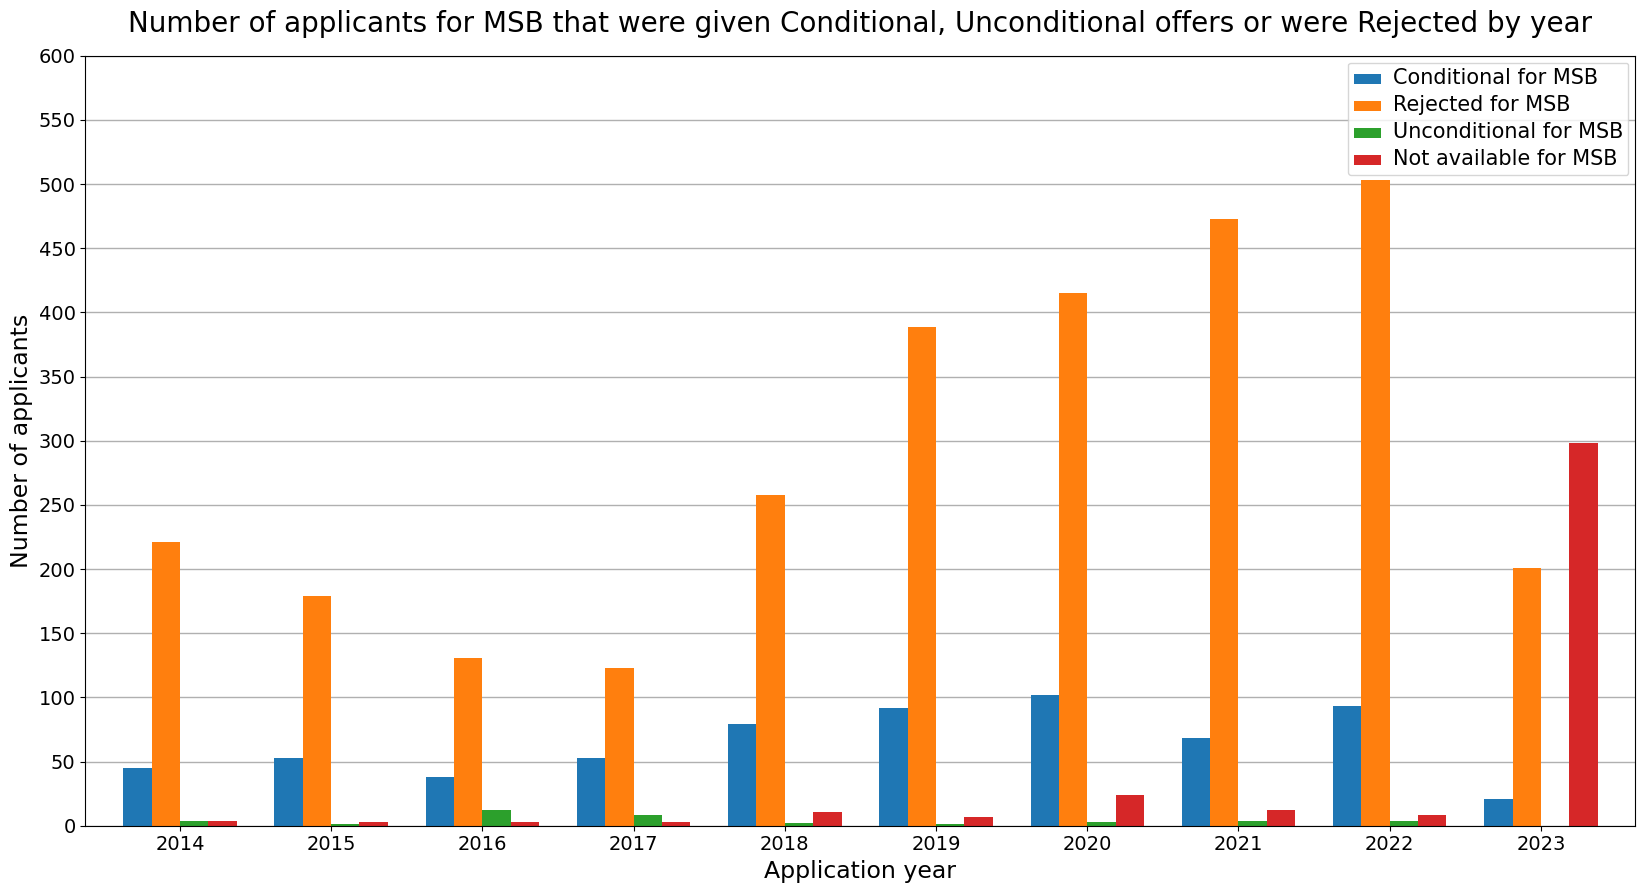

In [8]:
tailored_df_MSB_AS.plot(x='Year', y=['Conditional for MSB', 'Rejected for MSB', 'Unconditional for MSB', 'Not available for MSB'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for MSB that were given Conditional, Unconditional offers or were Rejected by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)

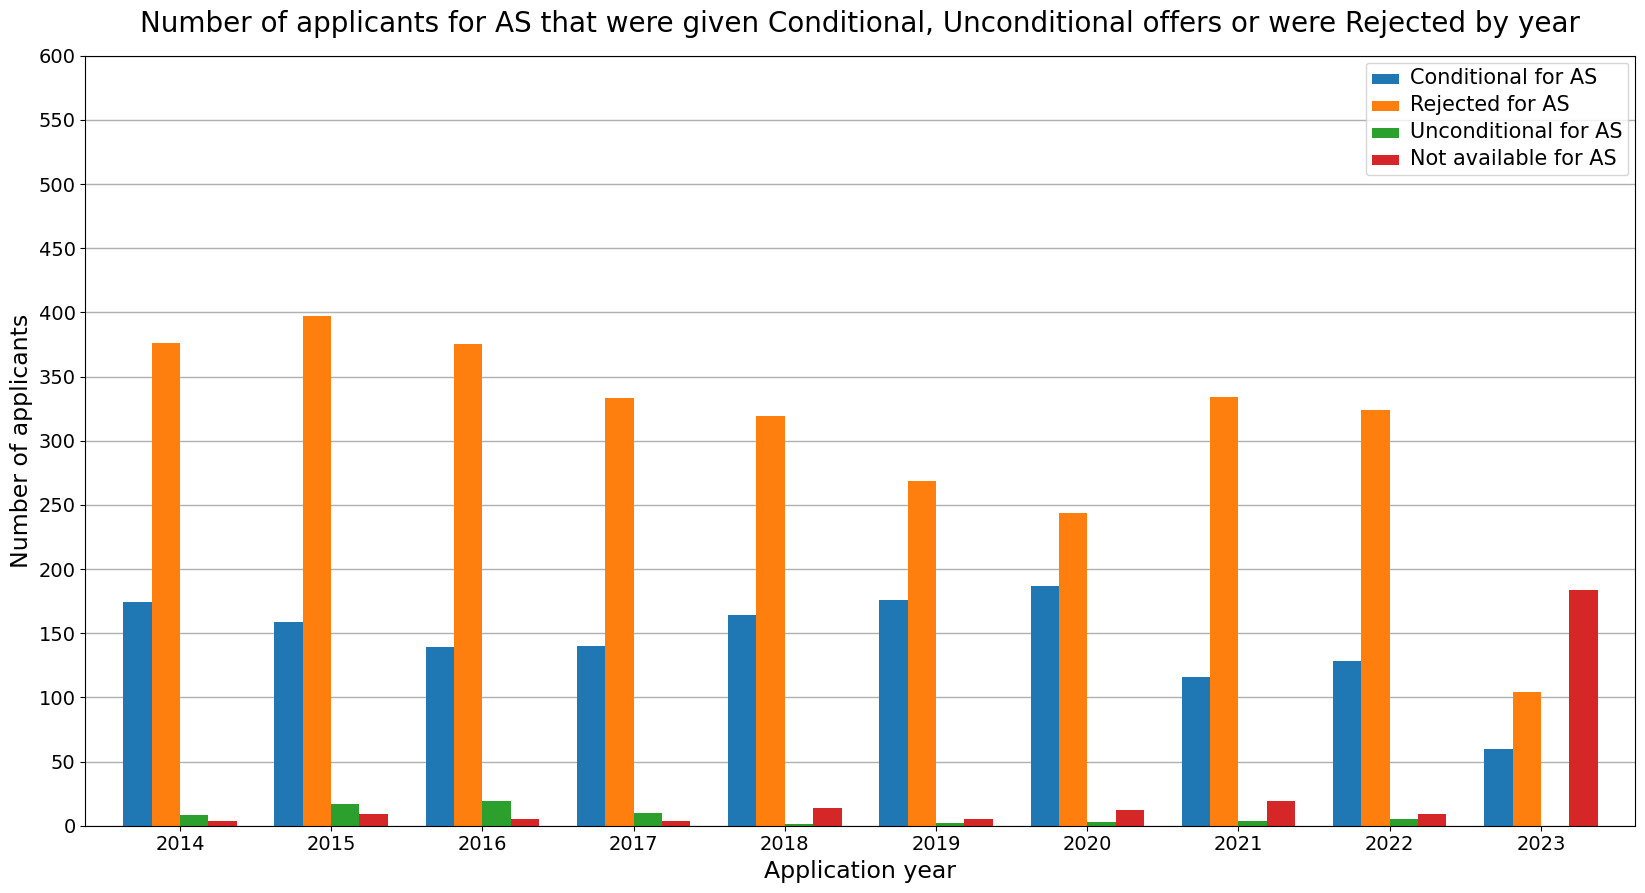

In [9]:
tailored_df_MSB_AS.plot(x='Year', y=['Conditional for AS', 'Rejected for AS', 'Unconditional for AS', 'Not available for AS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for AS that were given Conditional, Unconditional offers or were Rejected by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)

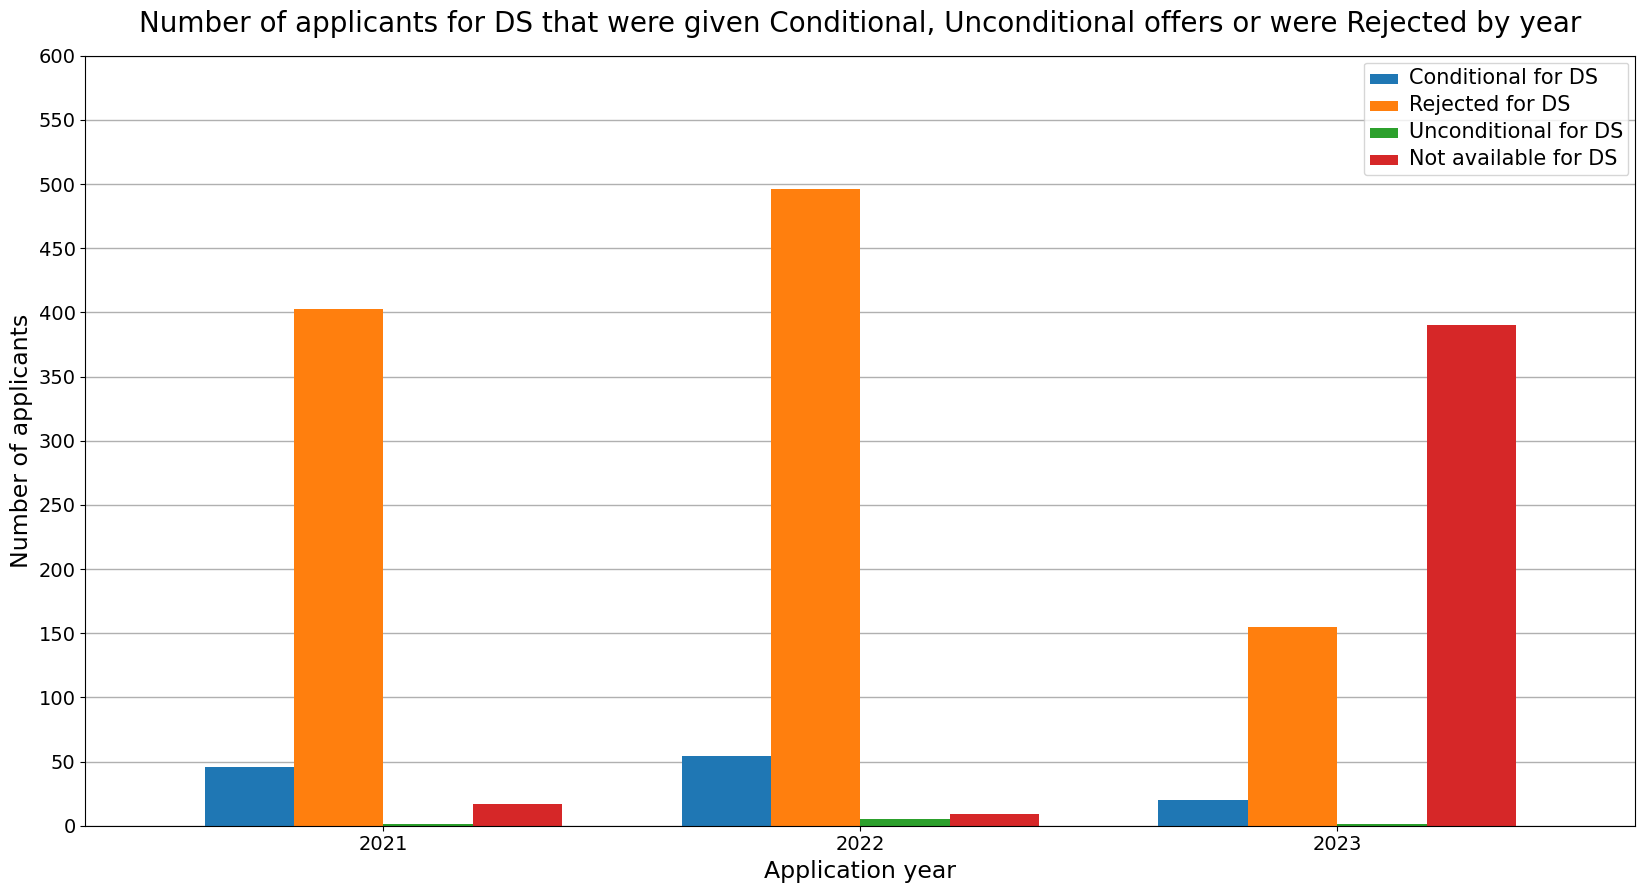

In [10]:
tailored_df_DS.plot(x='Year', y=['Conditional for DS', 'Rejected for DS', 'Unconditional for DS', 'Not available for DS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for DS that were given Conditional, Unconditional offers or were Rejected by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)

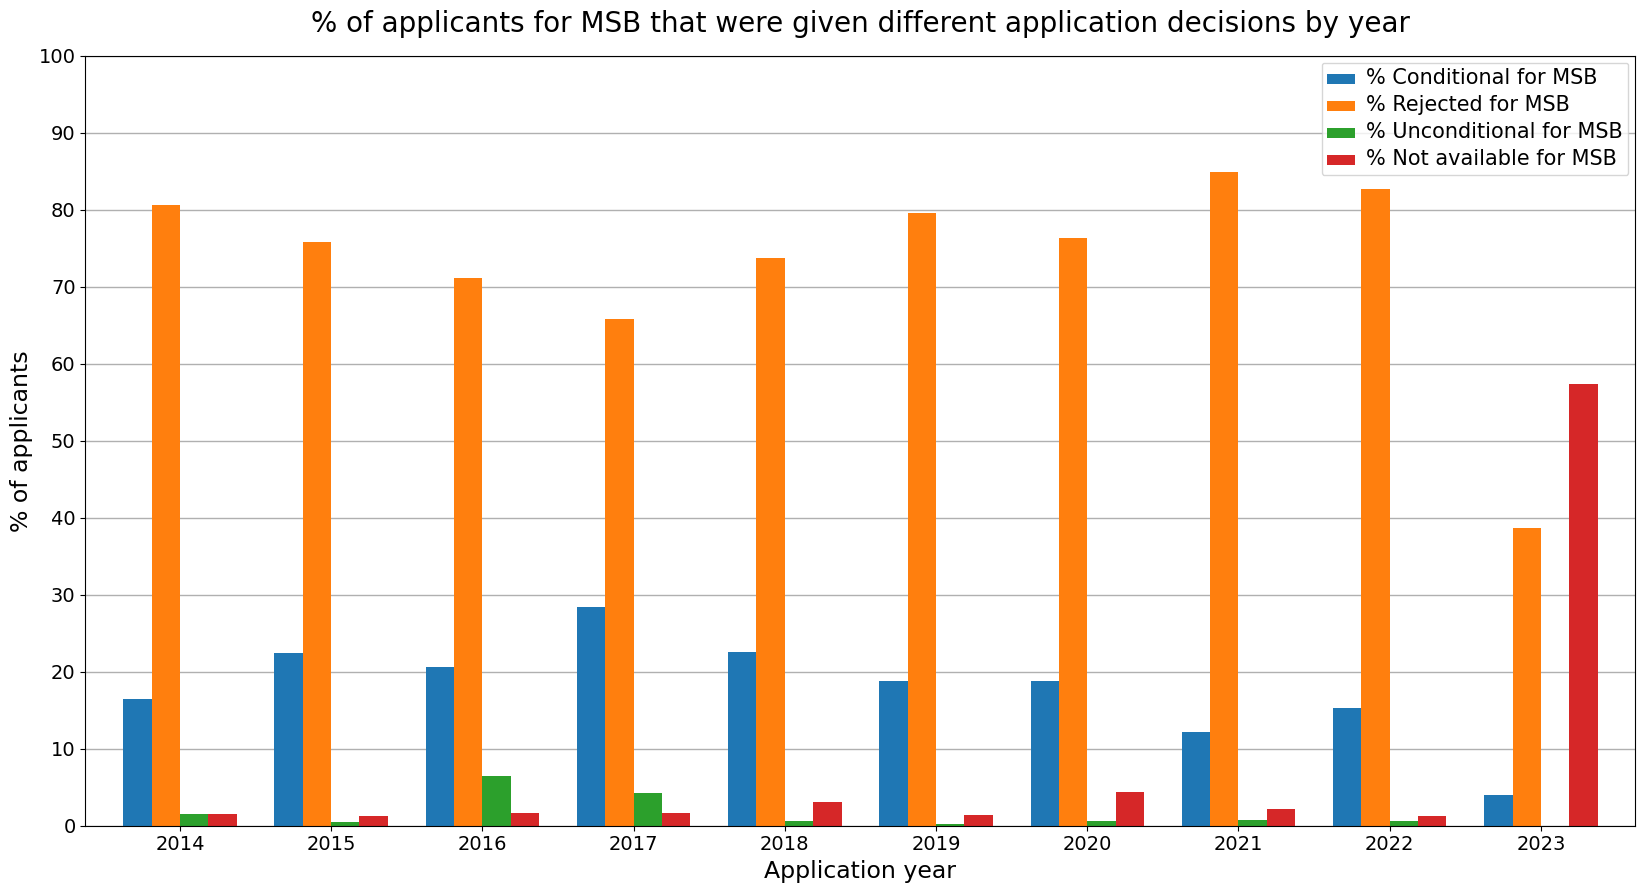

In [11]:
tailored_df_MSB_AS.plot(x='Year', y=['% Conditional for MSB', '% Rejected for MSB', '% Unconditional for MSB', '% Not available for MSB'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for MSB that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 100);

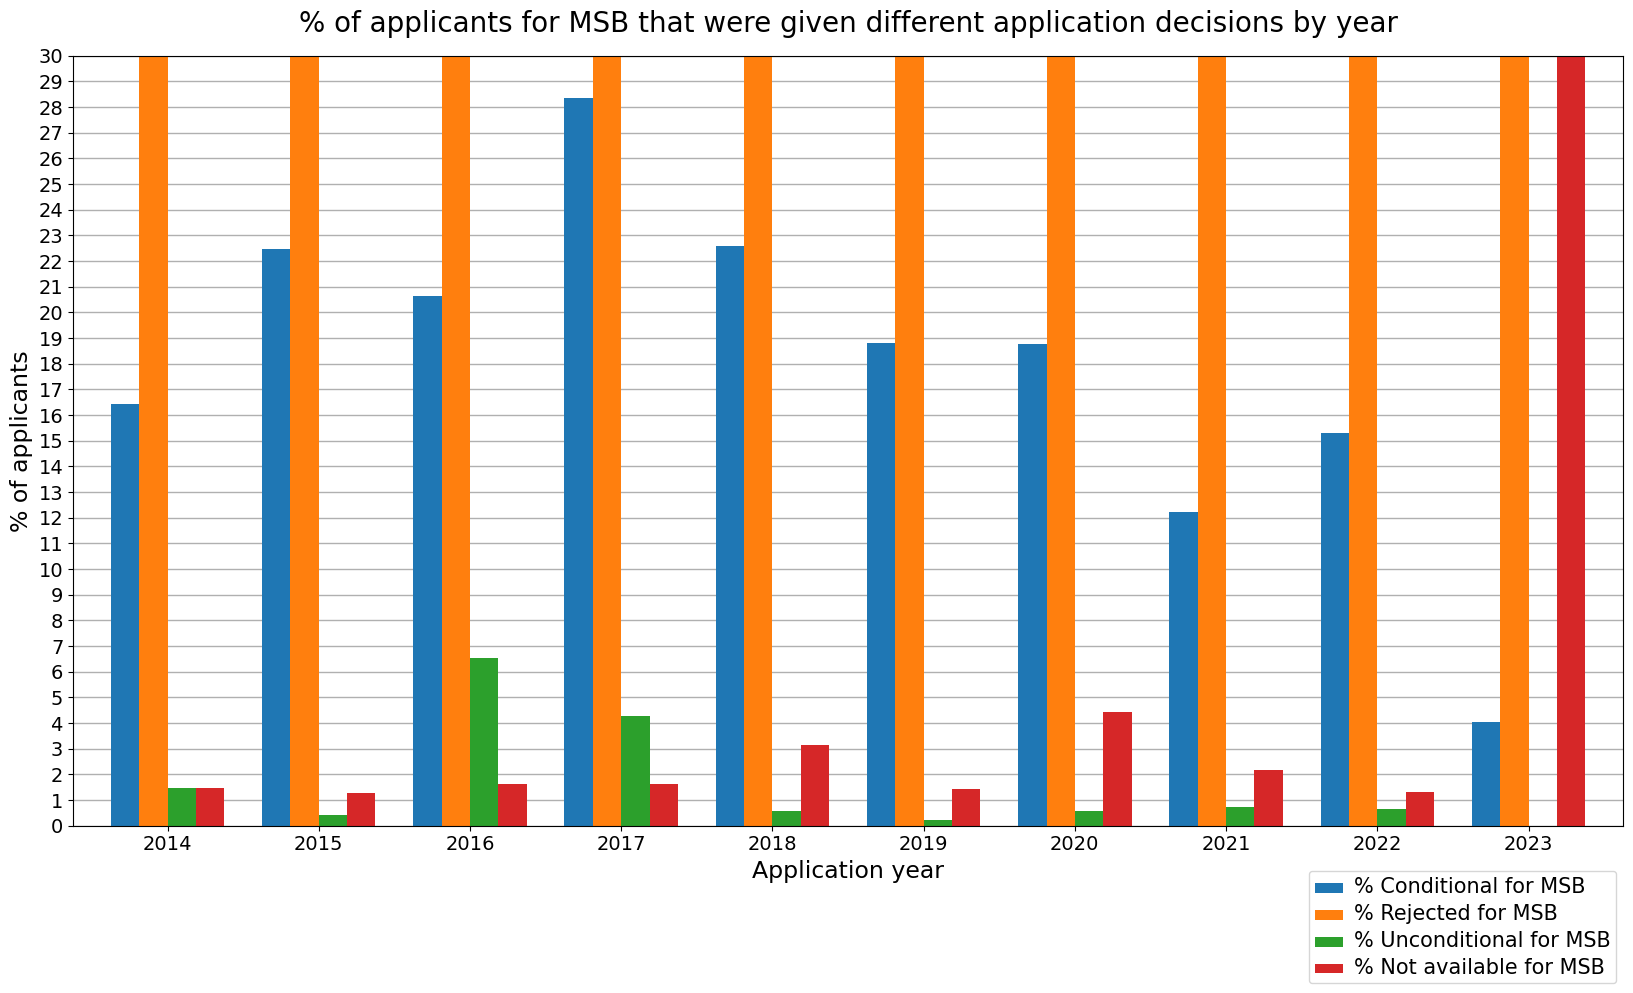

In [12]:
#zoomed in
tailored_df_MSB_AS.plot(x='Year', y=['% Conditional for MSB', '% Rejected for MSB', '% Unconditional for MSB', '% Not available for MSB'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,35,1));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for MSB that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 30);

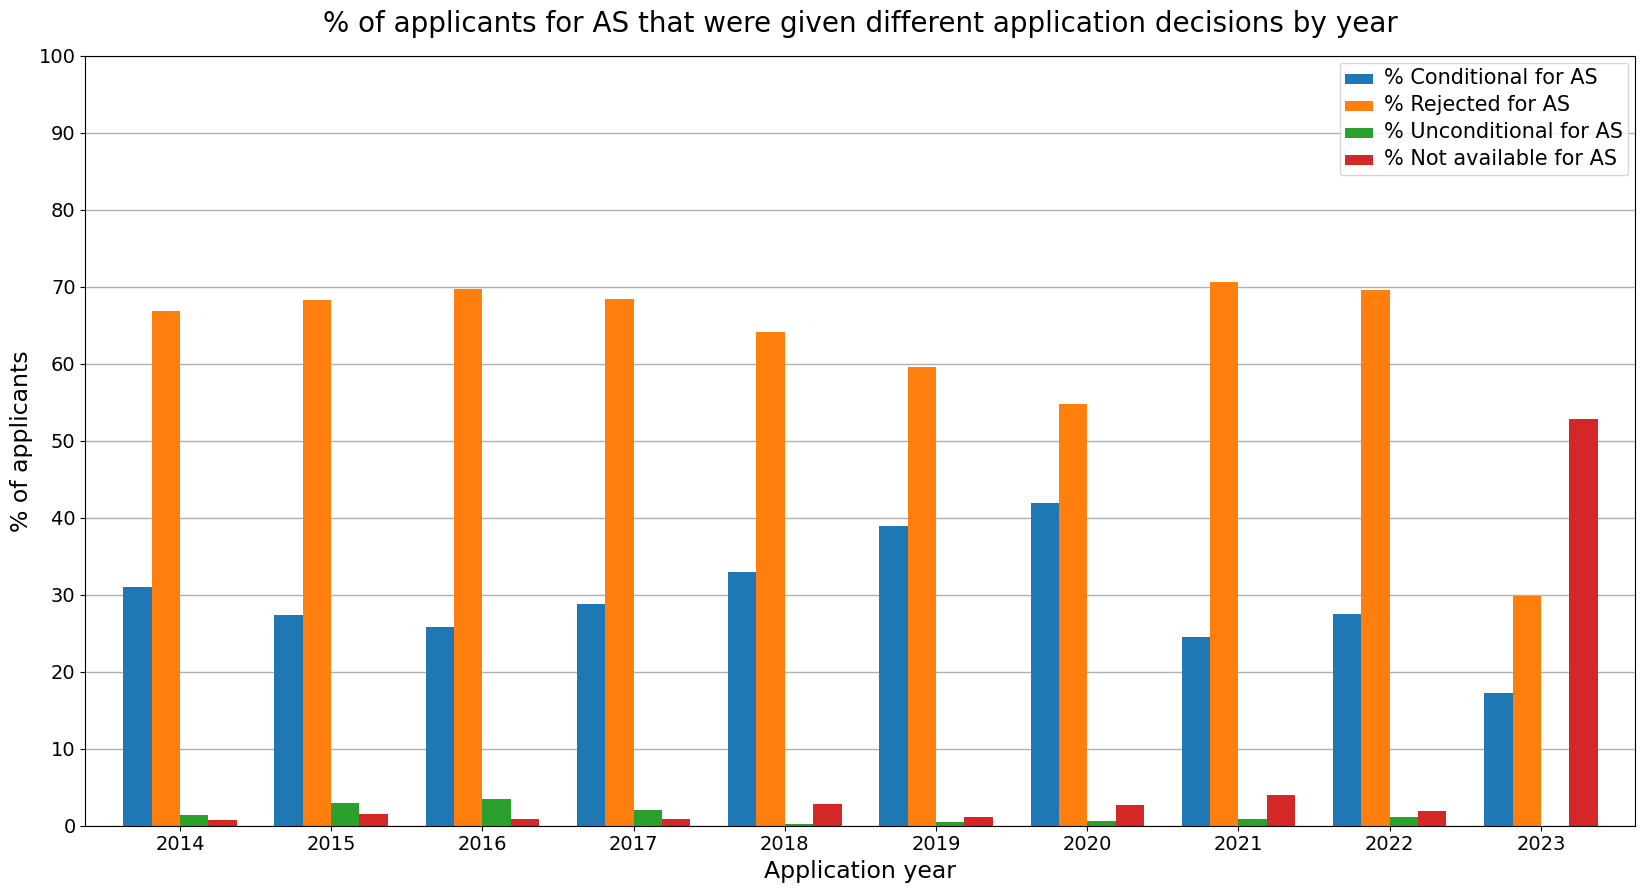

In [13]:
tailored_df_MSB_AS.plot(x='Year', y=['% Conditional for AS', '% Rejected for AS', '% Unconditional for AS', '% Not available for AS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for AS that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 100);

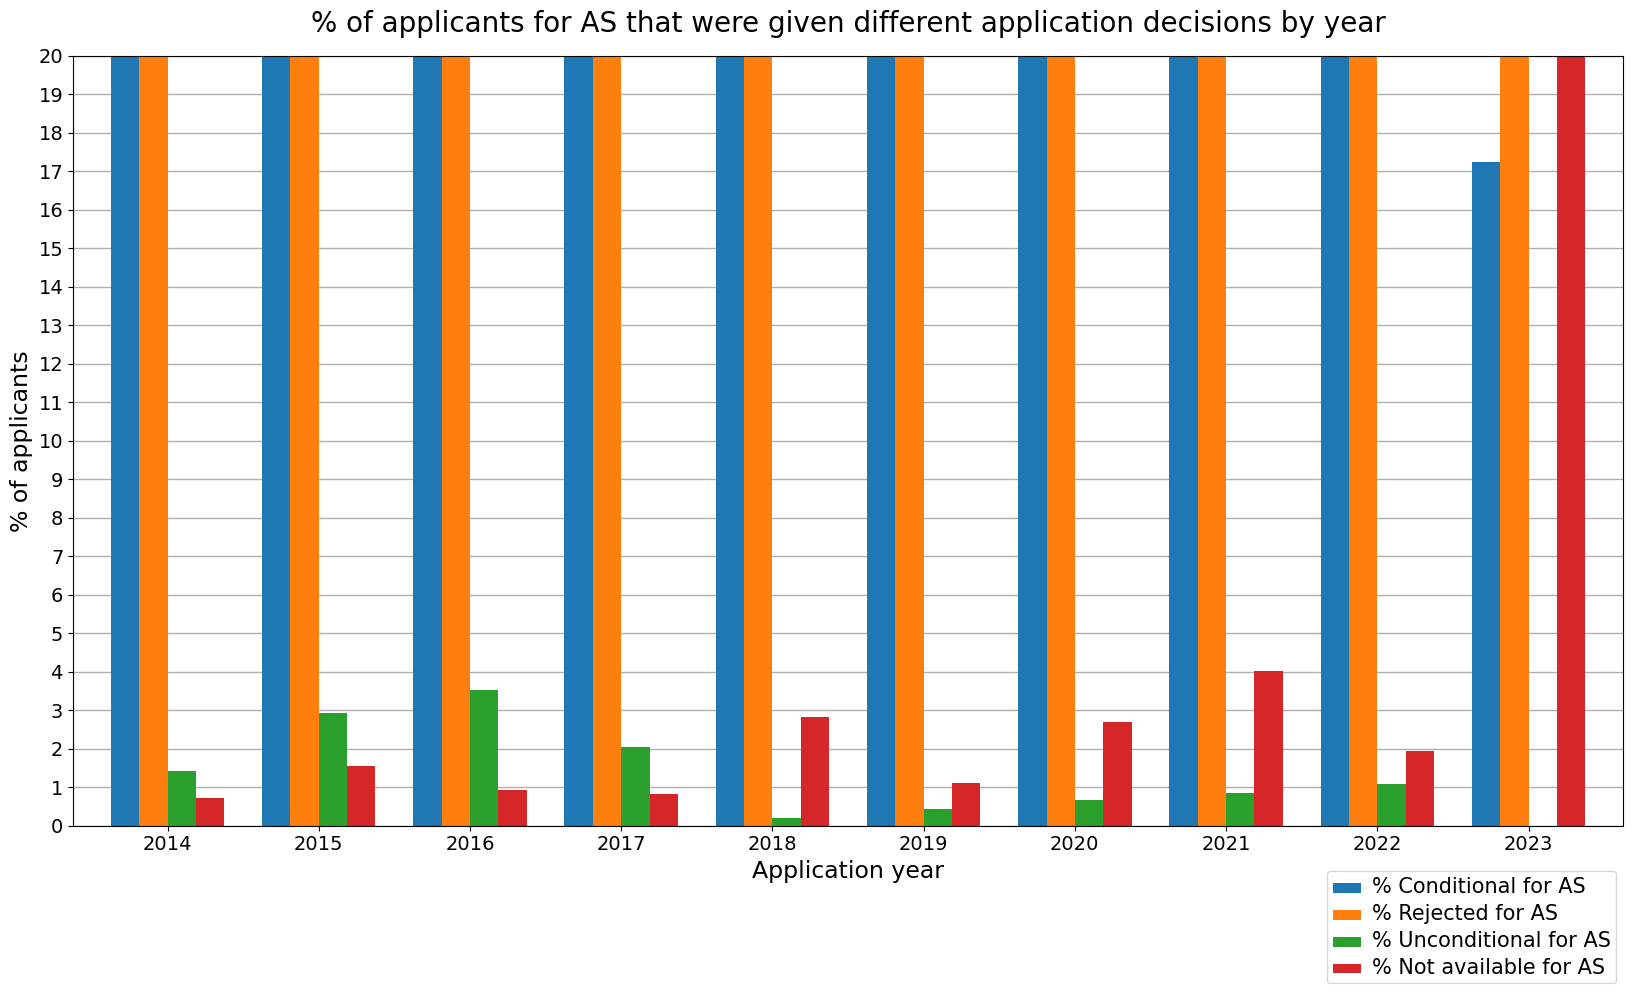

In [14]:
#zoomed in
tailored_df_MSB_AS.plot(x='Year', y=['% Conditional for AS', '% Rejected for AS', '% Unconditional for AS', '% Not available for AS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,21,1));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for AS that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 20);

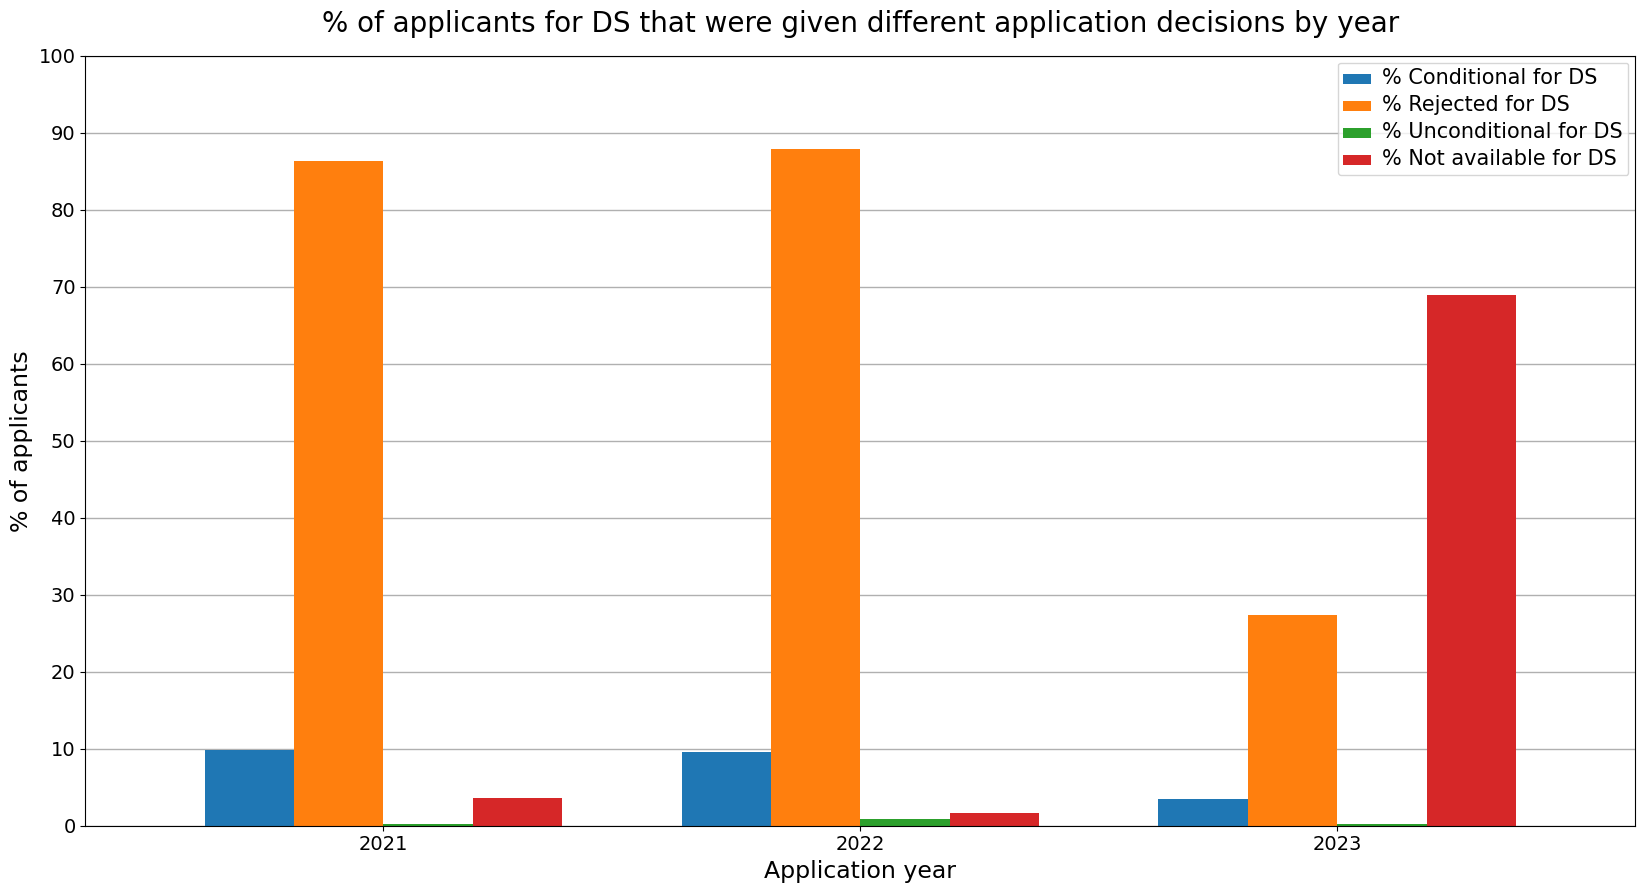

In [15]:
tailored_df_DS.plot(x='Year', y=['% Conditional for DS', '% Rejected for DS', '% Unconditional for DS', '% Not available for DS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for DS that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 100);

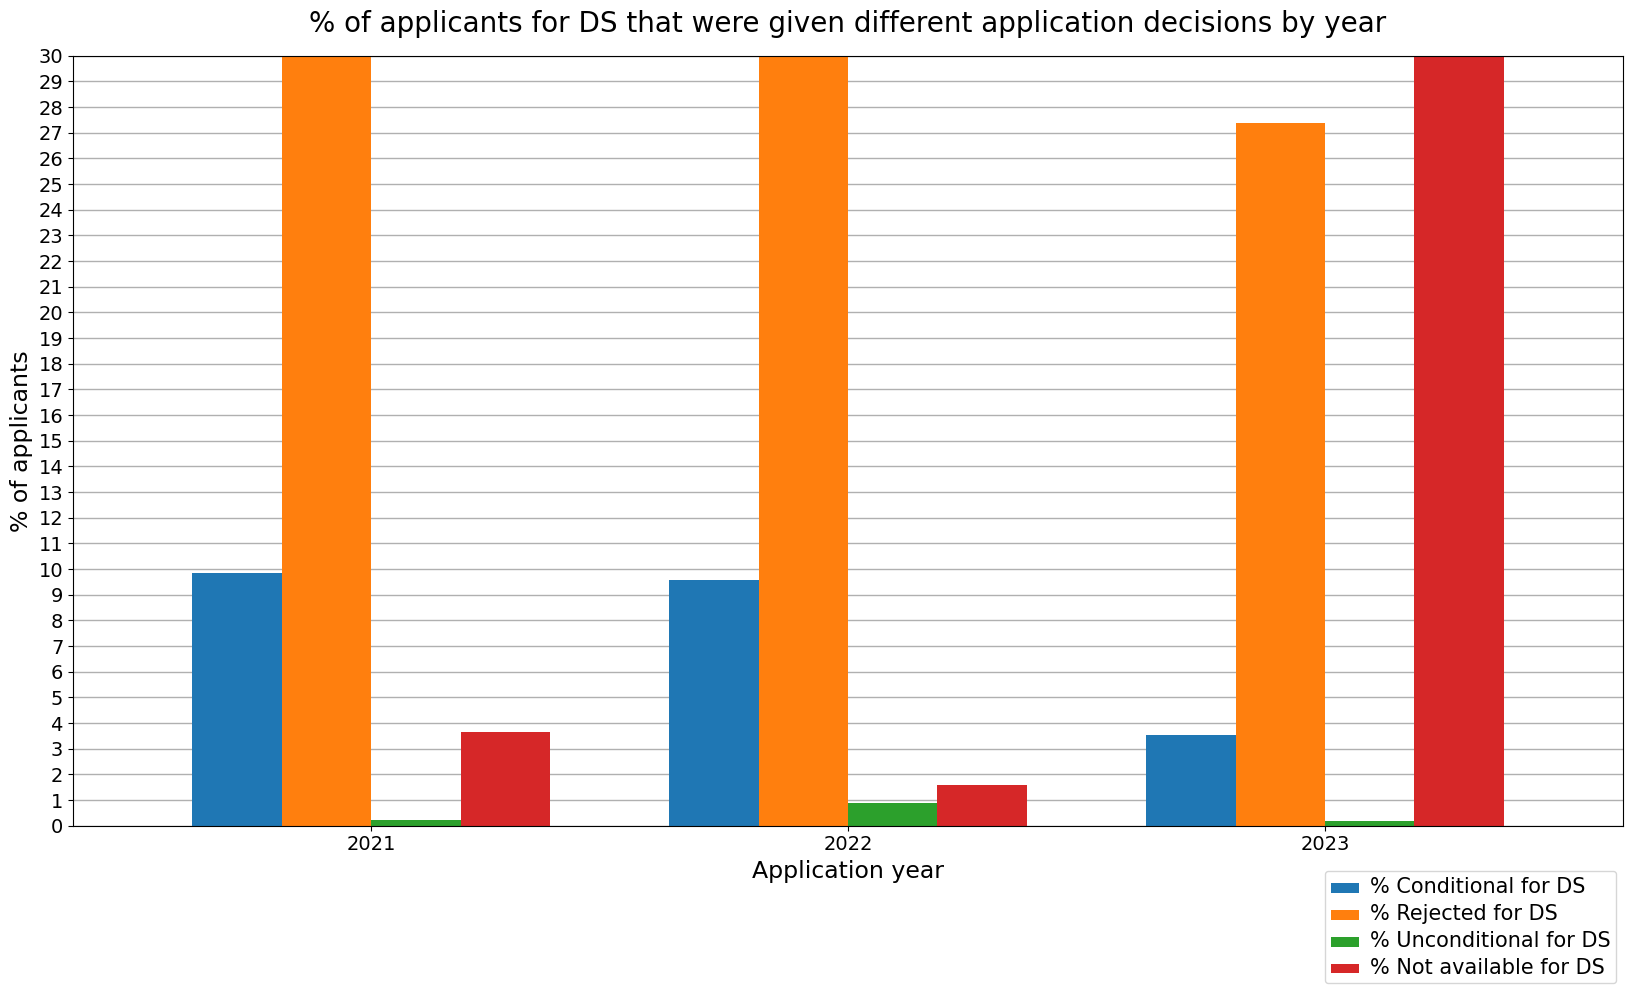

In [16]:
#zoomed in
tailored_df_DS.plot(x='Year', y=['% Conditional for DS', '% Rejected for DS', '% Unconditional for DS', '% Not available for DS'], kind='bar', figsize = (20, 10), width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,31,1));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for DS that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)
plt.ylim(0, 30);

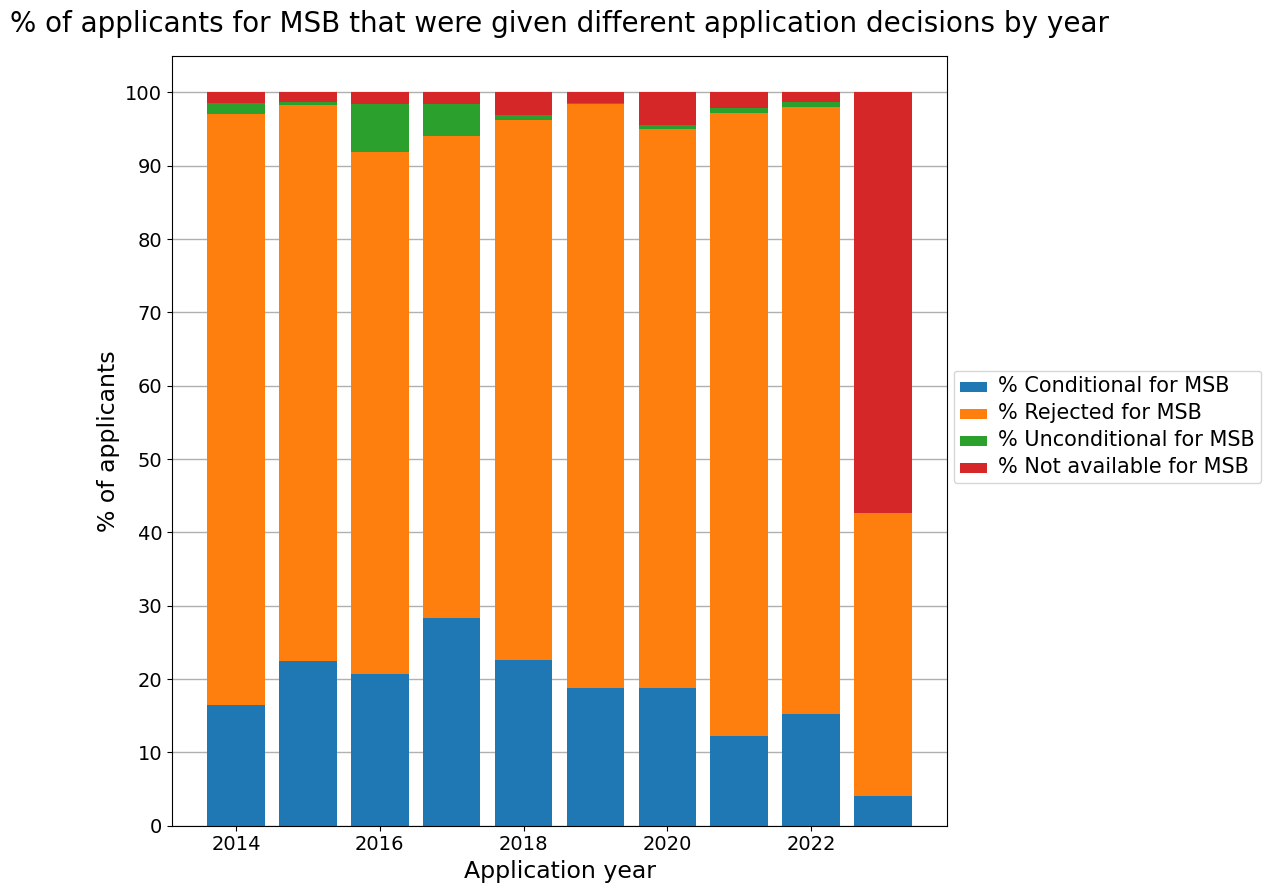

In [17]:
plt.figure(figsize = (10,10));
plt.bar(years_G0N0, tailored_df_MSB_AS['% Conditional for MSB'], label = '% Conditional for MSB', zorder = 2);
plt.bar(years_G0N0, tailored_df_MSB_AS['% Rejected for MSB'], bottom = tailored_df_MSB_AS['% Conditional for MSB'], label = '% Rejected for MSB', zorder = 2);
plt.bar(years_G0N0, tailored_df_MSB_AS['% Unconditional for MSB'], bottom = tailored_df_MSB_AS['% Rejected for MSB']+tailored_df_MSB_AS['% Conditional for MSB'], label = '% Unconditional for MSB', zorder = 2);
plt.bar(years_G0N0, tailored_df_MSB_AS['% Not available for MSB'], bottom = tailored_df_MSB_AS['% Conditional for MSB']+tailored_df_MSB_AS['% Rejected for MSB']+tailored_df_MSB_AS['% Unconditional for MSB'], label = '% Not available for MSB', zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('% of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('% of applicants for MSB that were given different application decisions by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, 0.6));
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)
legend.get_texts()[3].set_fontsize(15)

## Plotly visualisations

In [18]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Conditional for MSB'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Rejected for MSB'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Unconditional for MSB'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Not available for MSB'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='Number of applicants for MSB', tickvals = np.arange(0,700,50))

fig.update_layout(title_text='Number of applicants for MSB who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Conditional for MSB'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Rejected for MSB'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Unconditional for MSB'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Not available for MSB'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='% of applicants for MSB', tickvals = np.arange(0,110,10))

fig.update_layout(title_text='% of applicants for MSB who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

- % of applicants for MSB who received unconditional offers was the highest in 2016(6.5%). 

- 2017 was the year when almost 30% (the highest in 9 years) of applicants were accepted to the LSE MSB course. Consequently, 2017 was also the year when the lowest % of people(66%) was rejected to MSB course. 

- 2021 was the year when approximately 12% (the lowest in 9 years) of applicants were accepted to the LSE MSB course. Consequently, 2021 was also the year when the highest % of people was rejected (85%) to MSB course.

- 2023 doesn't provide valid insights because the data was issued in March, when not all of the statistics was calculated yet.

In [20]:
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Conditional for AS'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Rejected for AS'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Unconditional for AS'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['Not available for AS'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='Number of applicants for AS', tickvals = np.arange(0,700,50))

fig.update_layout(title_text='Number of applicants for AS who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Conditional for AS'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Rejected for AS'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Unconditional for AS'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_MSB_AS['Year'], y=tailored_df_MSB_AS['% Not available for AS'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='% of applicants for AS', tickvals = np.arange(0,700,50))

fig.update_layout(title_text='% of applicants for AS who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

- % of applicants for AS who received unconditional offers was the highest in 2016(3.5%). 

- 2020 was the year when almost 42% (the highest in 9 years) of applicants were accepted to the LSE AS course. Consequently, 2020 was also the year when the lowest % of people was rejected (54.7%) to AS course. 

-  2021 was the year when approximately 25% (the lowest in 9 years) of applicants were accepted to the LSE AS course. Consequently, 2021 was also the year when the highest % of people was rejected (70.6%) to AS course. 

- 2023 doesn't provide valid insights because the data was issued in March, when not all of the statistics was calculated yet.

In [22]:
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['Conditional for DS'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['Rejected for DS'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['Unconditional for DS'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['Not available for DS'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='Number of applicants for DS', tickvals = np.arange(0,700,50))

fig.update_layout(title_text='Number of applicants for DS who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['% Conditional for DS'], name='Accepted', marker_color = 'green'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['% Rejected for DS'], name='Rejected', marker_color = 'red'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['% Unconditional for DS'], name='Unconditional', marker_color = 'orange'))
fig.add_trace(go.Bar(x=tailored_df_DS['Year'], y=tailored_df_DS['% Not available for DS'], name='Not available', marker_color = 'blue'))
fig.update_xaxes(title_text='Application year', tickvals = np.arange(2014,2024,1))
fig.update_yaxes(title_text='% of applicants for DS', tickvals = np.arange(0,100,10))

fig.update_layout(title_text='% of applicants for DS who received different application decisions by year', title_x = 0.5, title_y = 0.9, title_font=dict(size=20))

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.6) 

- % of applicants for DS who received unconditional offers was the highest in 2022(0.9%).

- 2021 was the year when almost 9.85% (the highest in 2 years) of applicants were accepted to the LSE AS course. Consequently, 2021 was also the year when the lowest % of people was rejected (86.2%) to AS course.

- 2022 was the year when approximately 9.57% (the lowest in 10 years) of applicants were accepted to the LSE AS course. Consequently, 2022 was also the year when the highest % of people was rejected (87.9%) to AS course.

- 2023 doesn't provide valid insights because the data was issued in March, when not all of the statistics was calculated yet.